# CNN CLASSIFICATION - SKIN CANCER

## 1. Loading Modules and Configuration Settings

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import autokeras as ak

from skimage.io import imread, imshow

Using TensorFlow backend


In [2]:
# PD Options

pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 4)

## 2. Loading Dataset

### 2.1 Pickle File Content

In [3]:
df = pd.read_pickle('ham_image_100.pkl')

print(f'Shape of the Dataset: {df.shape}')
df.head()

Shape of the Dataset: (700, 6)


,image_id,dx,tag,Label,path,image
361,aug_akiec_50_8349081.jpg,akiec,augmented,0,./all_data_gen\aug_akiec_50_8349081.jpg,"[[[197, 129, 127], [200, 133, 139], [200, 136,..."
73,ISIC_0033705.jpg,akiec,original,0,./all_data_gen\ISIC_0033705.jpg,"[[[192, 157, 178], [197, 155, 176], [177, 134,..."
374,ISIC_0025712.jpg,akiec,original,0,./all_data_gen\ISIC_0025712.jpg,"[[[180, 127, 134], [178, 122, 125], [177, 121,..."
155,ISIC_0033084.jpg,akiec,original,0,./all_data_gen\ISIC_0033084.jpg,"[[[132, 114, 122], [128, 111, 118], [128, 110,..."
104,aug_akiec_19_5039450.jpg,akiec,augmented,0,./all_data_gen\aug_akiec_19_5039450.jpg,"[[[208, 103, 119], [206, 103, 105], [206, 102,..."


### 2.2 Sample Image

Class Label of the Image: mel
Shape of the Image: (128, 128, 3)


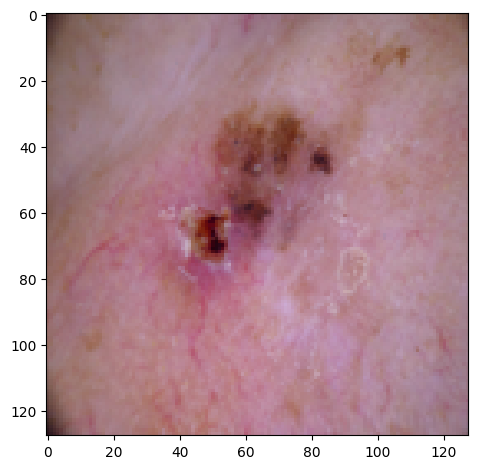

In [4]:
img = df.sample()

print(f'Class Label of the Image: {img["dx"].values[0]}')
print(f'Shape of the Image: {img["image"].values[0].shape}')
imshow(img['image'].values[0])

### 2.3 Class Labels

In [5]:
class_names = df['dx'].unique().tolist()
print(f'Class Labels: {class_names} ... \n')

nclasses = df['Label'].nunique()
print(f'Number of Class Labels: {nclasses} \n')

print('Class Distribution...')
df['dx'].value_counts()

Class Labels: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'] ... 

Number of Class Labels: 7 

Class Distribution...


dx
akiec    100
bcc      100
bkl      100
df       100
mel      100
nv       100
vasc     100
Name: count, dtype: int64

### 2.5 Perform Train, Test Split on Dataset

#### 2.5.1 Prepare X and y

In [6]:
X = np.asarray(df['image'].tolist())
print(f'Shape of X array: {X.shape}')
X = X/255.

y = np.asarray(df['Label'].values.tolist())
print(f'Shape of y array: {y.shape}')

Shape of X array: (700, 128, 128, 3)
Shape of y array: (700,)


#### 2.5.2 Train, Test Split

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=20, random_state=46, stratify=y)

## 3. CNN Model Search using AutoKeras

### 3.1 AutoKeras

In [ ]:
clf = ak.ImageClassifier(max_trials=3, seed=46) 
clf.fit(Xtrain, ytrain, epochs=10)

Reloading Tuner from .\image_classifier\tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
efficient         |vanilla           |image_block_1/block_type
True              |True              |image_block_1/normalize
True              |False             |image_block_1/augment
True              |None              |image_block_1/image_augmentation_1/horizontal_flip
False             |None              |image_block_1/image_augmentation_1/vertical_flip
0                 |None              |image_block_1/image_augmentation_1/contrast_factor
0                 |None              |image_block_1/image_augmentation_1/rotation_factor
0.1               |None              |image_block_1/image_augmentation_1/translation_factor
0                 |None              |image_block_1/image_augmentation_1/zoom_factor
True              |None              |image_block_1/efficient_net_block_1/pretrained
b7                |None              |image_block_1/efficient_net_b

### 3.2 Model Evaluation (Test Dataset)

In [ ]:
score = clf.evaluate(Xtest,ytest, verbose=0)
print(f'Accuracy on Test Set: {score[1]}')

### 3.3 Export and Save Model

In [ ]:
mdl = clf.export_model()
print(mdl.summary())

In [ ]:
#Save the model
mdl.save('sk_best_mdl.keras')